<a href="https://colab.research.google.com/github/nhs-pycom/coding-club/blob/main/introduction-to-data-ingestion/introduction-to-data-ingestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The NHSX Analytics Unit Python Coding Club Session 10**

*Created by*: Mattia Ficarelli


The goal for Python club session 10 and 11 is to source publicly available NHS prescribing data, transform it so it is fit for purpose, and then cartographically visualize it using various python libraries. The code based solution will be in the cell below the sandbox cells in this notebook.

This is the basic workflow which underlines this following page that I created. [HERE](https://nhsx.github.io/antibiotic_cost/)


# **1. Sourcing and transforming prescribing cost data from the OpenPrescribing API:**

The OpenPrescribing API allows you to explore England's prescribing data. This was an initiative which was created by the DataLab at Oxford University. 
Every month, the NHS in England publishes anonymised data about the drugs prescribed by GPs. But the raw data files are large and unwieldy, with more than 700 million rows. OpenPrescribing organises the raw data and allows anyone to explore the prescribing data. 


Documentation link [HERE](https://openprescribing.net/api/).


You have the option to retrive the data from the OpenPrescribing API on spending and items by CCG by month for the last five years for one the the following three medicines/drugs: 

1.   **Amoxicillin:** BNF code: *0501013B0*
2.   **Influenza vaccine**: BNF code *1404000H0*
3.   **Zolmitriptan (used to treat migranes):** *BNF code 0407041Z0*





You can retrieve data as a CSV, which we will subsequently transfrom in Pandas by appending the BNF code of your drug/medicine of choice followed by `&format=json` to the following URL.


*   **Partial URL =** https://openprescribing.net/api/1.0/spending_by_ccg/?code=





In [ ]:
#Task 1: Create the URL to query data from the OpenPrescribing API in CSV format and save it as a python variable called my_url. Make sure it is saved a string!

my_url = 

In [ ]:
# Import the urllib library in the google CoLab notebook

import urllib.request
from urllib.request import urlopen

**The urllib library**

Full documentation of the urllib.request library can be found [HERE](https://docs.python.org/3/library/urllib.request.html).

The urllib.request module defines functions and classes which help in opening URLs. We will be using the following function, urlopen, to extract data from the OpenPrescribing API.

*   `urllib.request.urlopen(url, data=None, [timeout, ]*, cafile=None, capath=None, cadefault=False, context=None`)

This will allow us to Open the URL (previusly defined in the cells above as my_url). All other module options will be left as default. 

In [ ]:
#Task 2: Set the vairable response_my_url as equal to the urlopen module specifying that the url to open is my_url.

response_my_url = 

In [ ]:
# Import the pandasand json library in the google CoLab notebook

import pandas as pd
import json


**The pandas library**

Full documentation of the pandas library can be found [HERE](https://pandas.pydata.org/docs/).

Pandas is a powerful and flexible and easy to use open source data analysis and manipulation library which will allow for data to be transformed in the format we need it to be.

As we are extracting the data from the OpenPrescribing API in JSON fromat, we can use the `pd.json_normalize` function to open the url response. This returns a pandas dataframe

` pd.json_normalize` provides a utility function to take a dict or list of dicts and normalize this semi-structured data into a flat table, ie. dataframe.



**The JSON library**

Full documentation of the JSON library can be found [HERE](https://docs.python.org/3/library/json.html).

we will use the following function: 

*   `json.loads(s, *, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, **kw)`
Deserialize s (a str, bytes or bytearray instance containing a JSON document) to a Python object using this conversion table.

In [ ]:
#Run this cell! json.loads function from the json library allows you to read and decode the json file in python. 

my_data = json.loads(response_my_url.read())

In [ ]:
#Task 3: use the pandas function normalise my_data sa dataframe, my_dataframe_1

my_dataframe_1 = 

In [ ]:
#Task 4: print out my_dataframe_1



Now that you have data in a dataframe time to transform it into a useable format with pandas. An image of what your dataframe should look like following transformation is attached below. It is up to you if you want to look at:

*  **items=** Number of prescribed items of the drug/medicine selected
* **actual_cost=** prescribing cost of the drug/medicine selected 



**How your transformed pandas dataframe should look like:**

In the below example I am only selecting the prescribed cost of the drug, in this case the influenza vaccine.

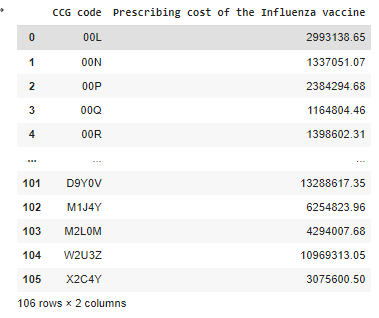

In [ ]:
#Task 5: Pandas sandbox, using a combination of various panadas functions get your dataframe to mirror the one in the image above. You have 10 min. The overall goal is to calculate 
#the cumulative total prescribing cost through time of your drug of choice per CCG.
#Hints: 1. Either create a new dataframe which only contains your columns of intrest, or drop the unwanted columns.
#       2. Groupby  row_id. Do not group by the date column as we want to have the cumulative sum of the values through time
#       3. Reset the index of the dataframe
#       4. Rename the columns so that they are more descriptive, this can be up to your discretion
#       5. Save your final dataframe as my_processed_dataframe


In [ ]:
#Task 1 solution:
#This uses the BNF code for the influenza vaccine. 

my_url = 'https://openprescribing.net/api/1.0/spending_by_ccg/?code=1404000H0&format=json'

In [ ]:
#Task 2 solution:

response_my_url = urllib.request.urlopen(my_url)
my_data = json.loads(response_my_url.read())

In [ ]:
#Task 3 and 4 solution: 

my_dataframe_1 = pd.json_normalize(my_data)
print(my_dataframe_1)

In [ ]:
#Task 5 solution:
#This uses prescribing cost data for the influenza vaccine. 

my_dataframe_2 = my_dataframe_1[["row_id", "actual_cost"]]
#or my_dataframe_2 = my_dataframe_1.drop(columns=['items', 'quantity'])
my_dataframe_3 = my_dataframe_2.groupby([ 'row_id']).sum().reset_index()
my_dataframe_4 = my_dataframe_3.rename(columns = {'row_id': 'CCG code', 'actual_cost': 'Prescribing cost of the Influenza vaccine'})
my_processed_dataframe = my_dataframe_4.copy()


# **2. Sourcing a GeoJSON file from the ONS Geography Portal**

The Open Geography portal from the Office for National Statistics (ONS) provides free and open access to the definitive source of geographic products, web applications, story maps, services and APIs. We will use their API to source a GeoJSON file for CCGs. 

The Open Geography portal can be explored [HERE](https://geoportal.statistics.gov.uk/)

**What is a GeoJSON file?:** GeoJSON is an open standard geospatial data interchange data format that represents simple geographic features and their nonspatial attributes. Based on JavaScript Object Notation (JSON), GeoJSON is a format for encoding a variety of geographic data structures. 

**CCG GeoJSON file:**

The URL to extract the CCG GeoJSON from the ONE Geography portal API can be found on the following page, [HERE](https://geoportal.statistics.gov.uk/datasets/ons::clinical-commissioning-groups-april-2021-en-buc/api)

In [ ]:
# Import the geojson library in the google CoLab notebook

!pip install GeoJson
import geojson

In [ ]:
#Task 6: Copy the URL from the above webpage to get the CCG GeoJSON file from the ONS Geogrpahy Portal, and save it as my_ccg_shapefile_url:

my_ccg_shapefile_url = 

In [ ]:
#Task 7: Using urllib.response and geojson.loads + .read() function save the json file as my_ccg_shapefile

In [ ]:
#Task 8: print out the result of my_ccg_shapefile

In [ ]:
#Task 6 solution:

my_ccg_shapefile_url = 'https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Clinical_Commissioning_Groups_April_2021_EN_BUC/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'

In [ ]:
#Task 7 and 8 solution:

response_my_ccg_shapefile = urllib.request.urlopen(my_ccg_shapefile_url)
my_ccg_shapefile = geojson.loads(response_my_ccg_shapefile.read())
my_ccg_shapefile

# **3. Welcome to NHS Data, aligning ONS and ODS codes**

OpenPrescribing data uses ODS codes while data from the Open Geography portal uses ONS codes. What are even are they!??!!!

*   **ODS codes**: The Organisation Data Service issues and manages unique identification codes, **called ODS codes**, and accompanying reference data for organisations that interact with any area of the NHS. 
*   **ONS codes**: The Government Statistical Service (GSS) Coding and Naming Policy, issues a comparable put different set of codes, **called ONS codes**, for any organization or region in the country.

Broadly speaking, every ODS code has matching an ONS code.

**Our problem?**: The prescribing data from the Open Prescirbing API has ODS codes, but the GeoJSON file we have just extracted from the Open Geography portal uses ONS codes. Therefore in order to match our Geography data with our prescribing data we need to know the conversion between ODS and ONS CCG codes. 



**ODS to ONS code mapping for CCGs.**

The URL for a table which maps ONS CCG codes to ODS CCG codes can be found [HERE](https://geoportal.statistics.gov.uk/datasets/ons::clinical-commissioning-groups-april-2021-names-and-codes-in-england/api)

In [ ]:
#Task 9: Copy the URL from the above webpage to get the ONS to ODS code mapping file from the ONS Geogrpahy Portal, and save it as my_ccg_code_mapping_url

my_ccg_code_mapping_url = 

In [ ]:
#Task 10: Using a similar strategy to when you were ingesting and transforming the prescribing data create a dataframe, called my_code_mapping_dataframe, with the nromalized json file from the API 
#Due to the complex strucutre of the JSON file you need to normalize only the feautures level of the json file. Therefore use pd.json_normalize(x['features'])



**Further reading:**

More information on how to use pd.json_normalize to flatten json data with multiple levels can be found in this excellent article, link [HERE](https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd). 

In [ ]:
#Task 11: Manipulate your ODS to ONS code mapping dataframe to look like the image above.
#Hints:
#1. Rename the columns 'attributes.CCG21CD' to 'CCG ONS code', 'attributes.CCG21CDH' to 'CCG code' and 'attributes.CCG21NM' to 'CCG name'
#2 Drop the attributes.FID column
#Save your final dataframe as my_final_code_mapping_dataframe



**Pandas merge:**

Pandas merge documentation can be found [HERE](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)

Pandas merge function:

* `pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)`



**How your merged dataframe should look like:**


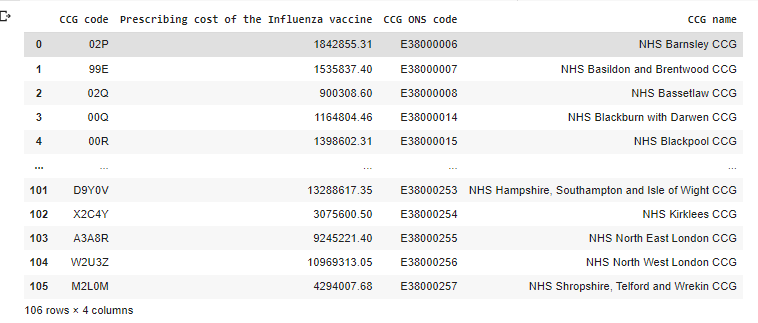

In [ ]:
#Task 12:
#Merge your my_processed_dataframe and my_final_code_mapping_dataframe on ODS code, your my_processed_dataframe should be on the left and your my_final_code_mapping_dataframe on the right. Conduct a right merge(right join). 
#Your new dataframe should be called my_final_dataframe
#Hint: pd.merge(left_dataframe, right_dataframe, how='right', on='CCG code')


**Important point on data quality**:

Conducting a right join on our ODS to ONS code mapping dataframe will result any CCGs which are no longer open (as of April 2021) to be dropped from our dataframe with our prescribiding data. We want this to happen, as as our shapefile only contains geography data of currently open CCGs (as of April 2021).

In [ ]:
#Task 9 solution: 

my_ccg_code_mapping_url = 'https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/CCG_APR_2021_EN_NC/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'

In [ ]:
#Task 10 solution:

response_my_mapping_url = urllib.request.urlopen(my_ccg_code_mapping_url)
my_mapping_data = json.loads(response_my_mapping_url.read())
my_code_mapping_dataframe = pd.json_normalize(my_mapping_data['features'])

In [ ]:
#Task 11 solution:

my_code_mapping_dataframe_1 = my_code_mapping_dataframe[["attributes.CCG21CD", "attributes.CCG21CDH", "attributes.CCG21NM"]]
my_final_code_mapping_dataframe = my_code_mapping_dataframe_1.rename(columns = {"attributes.CCG21CD": "CCG ONS code", "attributes.CCG21CDH": "CCG code","attributes.CCG21NM": "CCG name"})

In [ ]:
#Task 12 solution:

my_final_dataframe = pd.merge(my_processed_dataframe, my_final_code_mapping_dataframe, how='right', on='CCG code')
my_final_dataframe

#**The NHSX Analytics Unit Python Coding Club Session 11**

*Created by*: Mattia Ficarelli

The goal for this session of python coding club is to cartographfically visualize the data we prepared during session 10 using the python library Folium. 

Documentation for the Folium library can be found [HERE](https://python-visualization.github.io/folium/). 

Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth. The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. folium supports both Image, Video, GeoJSON and TopoJSON overlays.

# **4. Adding a base tile layer to your folium map**

The tile layer of your folium map forms the background onto which your data is displayed one. Folium has many different tile layer options, which allows for the option which best suits your needs to be selected.

In [ ]:
# Import the folium library in the google CoLab notebook

import folium
!pip install branca --upgrade


**How your map base layer should look like:**

Here the cartodbpositron tile layer option is used


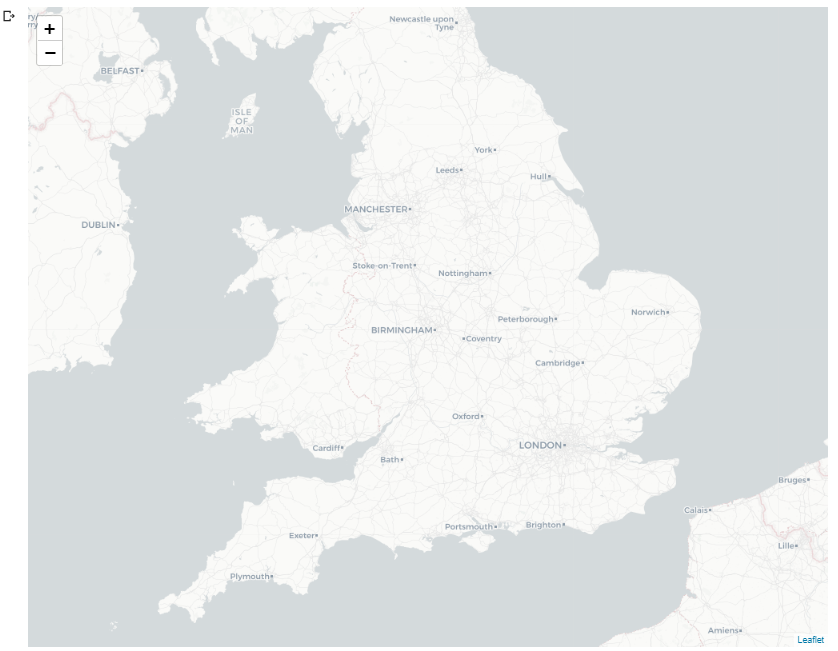

**Tile layer options:**

Folium has different tile layer options. Pick the one which you like best. Add them as a string to your tiles option in the cell below. 

* `cartodbpositron`
* `OpenStreetMap`
* `Stamen Terrain`
* `Stamen Toner`
*  `stamenwatercolor`
*  `cartodbdark_matter`

In [ ]:
#Task 13: Edit the code below and using different location coordinates and zoom options generate a map whose layout is centred as above
#Hint google the longitutde and latitude coordinates of England

frame = folium.Figure(width=1000, height=900)
my_map = folium.Map(
    location=[x,y],
    tiles=,
    zoom_start=z).add_to(frame)
my_map

In [ ]:
#Task 13 solution:

frame = folium.Figure(width=1000, height=900)
my_map = folium.Map(
    location=[53, -2],
    tiles="cartodbpositron",
    zoom_start=7).add_to(frame)

# **5. Adding a Choropleth layer to your folium map**

Choropleth can be easily created by binding the data between Pandas DataFrames/Series and Geo/TopoJSON geometries. Color Brewer sequential color schemes are built-in to the library, and can be passed to quickly visualize different combinations.

Combining GeoJSON data with data in a Pandas Dataframe:

We have the CCG GeJSON data saved as `my_ccg_shapefile` and data sourced from OpenPrescribing.net as `my_final_dataframe`. Remember that we need to key on ONS codes as the GeoJSON uses ONS codes as a unique identifier. 

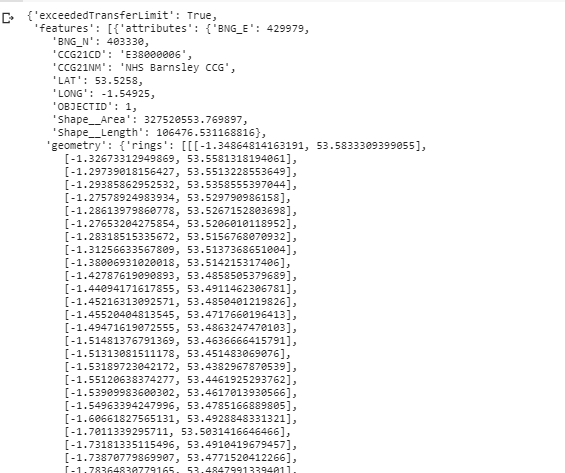

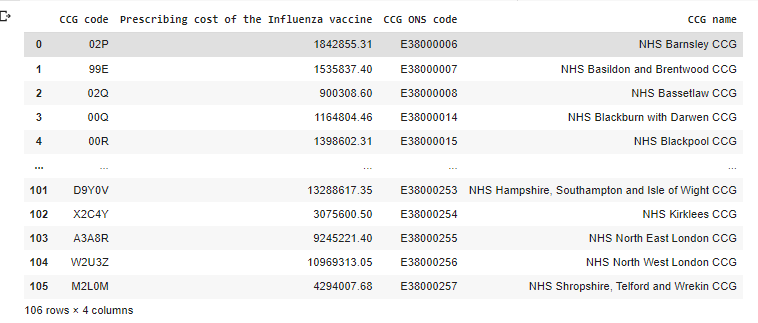

**Shapefile issue:**

Unfortunately Google CoLab isnt able to pull the full GeoJSON file from the ONS GeoPortal API. Therefore we need to manually upload the file into CoLab

In [ ]:
#Run this cell!

github_url = 'https://raw.githubusercontent.com/nhs-pycom/coding_club_nhs_data_ingestion/main/ccg_shapefile.geojson'
response = urlopen(github_url)
full_ccg_shapefile = json.loads(response.read())

In [ ]:
#Task 14
#Add a choropleth layer to your map by adding to the code below
#Hint
#1. geo_data=: is your GeoJSON (new one we downloaded in the cell above)
#2. name=: is the name which your want give to your choropleth layer, pass this as a string
#3. data=: is the data in pandas dataframe, the final one to which ONS codes were added to 
#4. columns=: subset of columns from your final pandas dataframe. Pass them as a list ["column x", "column y"]
#5. key_on: key shared between data in your GeoJSON and your dataframe in this case ONS codes. 
#6. fill_color: options are listed in the cell below (pass them as a string), you can also modulate the opacity of the layers (scale from 0.1 - 1)
#7. legend_name: pass the name you want to gibe the legend as a string. 

folium.Choropleth(
    geo_data=,
    name=,
    columns=,
    data=,
    key_on= 'feature.properties.CCG21CD',
    fill_color=,
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name=
).add_to(my_map)
folium.LayerControl().add_to(my_map)
my_map

**Fill colour options:**

Folium has different fill options for chlorpleth layers. Pick the one which you like best. Add them as a string to your fill_color option in the cell below. 

* `YlOrBr`
* `BuGn`
* `BuPu`
* `GnBu`
*  `OrRd`
*  `PuBuGn`
*  `PuRd`
*  `RdPu`
*  `YlGn`


In [ ]:
#Task 14 solution:

folium.Choropleth(
    geo_data= full_ccg_shapefile,
    name= 'Prescribing cost of the Influenza vaccine by CCG',
    data= my_final_dataframe,
    columns=["CCG ONS code", "Prescribing cost of the Influenza vaccine"],
    key_on= 'feature.properties.CCG21CD',
    fill_color="BuGn",
    fill_opacity=1,
    line_opacity=1,
    legend_name= 'Prescribing cost of the Influenza vaccine (£)',
   ).add_to(my_map)
folium.LayerControl().add_to(my_map)

# **6. Adding additional folium map features**

To your folium map with a chloropleth layer, additional features such as a popup with information which will appear dynamically on hover. Map markers can also be added.

**Adding dynamic information on hover to your folium map:**

In [ ]:
# Task 15:
# Fields=: The fields from your GeoJSON that you want to add as infromation on hover we want to show the CCG ONS code, 'CCG21CD', and the CCG Name 'CCG21NM'. Pass these as a list of strings.
# aliases=: More descriptive names for your fields. Pass then as a list of strings in the order you passed the fields.

data_on_hover = folium.features.GeoJson(data = full_ccg_shapefile, control=False, tooltip=folium.features.GeoJsonTooltip(
    fields= [x,y,z] 
    aliases=[x,y,z],
    style=("background-color: white; color: #333333; font-family: arial; font-size: 14px; padding: 10px;")))
my_map.add_child(data_on_hover)
my_map.keep_in_front(data_on_hover)
my_map

**Adding a marker to your folium Map**

In [ ]:
#Task 16: Add a marker to your map
# Hint:
#Location =: The cordinates of where you want your marker to be
#popup =: the name of your marker, passed as as string

folium.Marker(
    location=[x, y],
    popup=,
    icon=folium.Icon(color="red", icon="dot-circle-o", prefix='fa'),
).add_to(my_map)
my_map

Multiple markers can be added to the same map, and the icon style can be chnaged as well. Try replacing with dot-circle-o with some of the options found below. 



*   `ambulance`
*   `h-square`
*   `user-md`
*   `medkit`

Hundreds of additional options can be found on this link [HERE](https://fontawesome.com/v5.15/icons?d=gallery&p=2).



In [ ]:
# Task 15 solution:

data_on_hover = folium.features.GeoJson(data = full_ccg_shapefile, control=False, tooltip=folium.features.GeoJsonTooltip(
    fields= ['CCG21CD', 'CCG21NM'], 
    aliases=['CCG ONS Code: ', 'CCG Name: '],
    style=("background-color: white; color: #333333; font-family: arial; font-size: 14px; padding: 10px;")))
my_map.add_child(data_on_hover)
my_map.keep_in_front(data_on_hover)


In [ ]:
#Task 16 solution:
folium.Marker(
    location=[51.5072, 0.1276],
    popup= 'London',
    icon=folium.Icon(color="red", icon="dot-circle-o", prefix='fa'),
).add_to(my_map)
my_map

**Your folium map can be saved as a .html file**

Download this file and then open it on any browser of your choice.

In [ ]:
#Run this cell! Download my_map.html and open it in your browser.

my_map.save(outfile= "/my_map.html")